## Exploratory Data Analysis for Well Log Lithology Classification
### By Mohammad Shehar Yaar Tausif

Dataset link : https://zenodo.org/records/4351156#.YXhFTBrMJPb

In [2]:
# imports
# import warnings
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lasio
import missingno as msno

## Reading the Dataset

In [3]:
# Training dataset
raw_df = pd.read_csv('./data/train.csv', sep=';')
#raw_df.head()

In [4]:
# Training data Rows and Columns
# print(raw_df.info())
print(f"The training dataset has {raw_df.shape[0]} rows and {raw_df.shape[1]} columns")

The training dataset has 1170511 rows and 29 columns


In [6]:
# Testing Data
test_df = pd.read_csv('./data/test.csv', sep=';')
test_df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,37.304054,NaN,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,37.864922,NaN,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN


In [7]:
# Test data Rows and Columns
# print(test_df.info())
print(f"The testing dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns")

The testing dataset has 136786 rows and 27 columns


## Understanding the dataset

### Missing Values

/tmp/ipykernel_31335/2023238663.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_well = raw_df.groupby('WELL').apply(lambda x: x.isnull().mean())


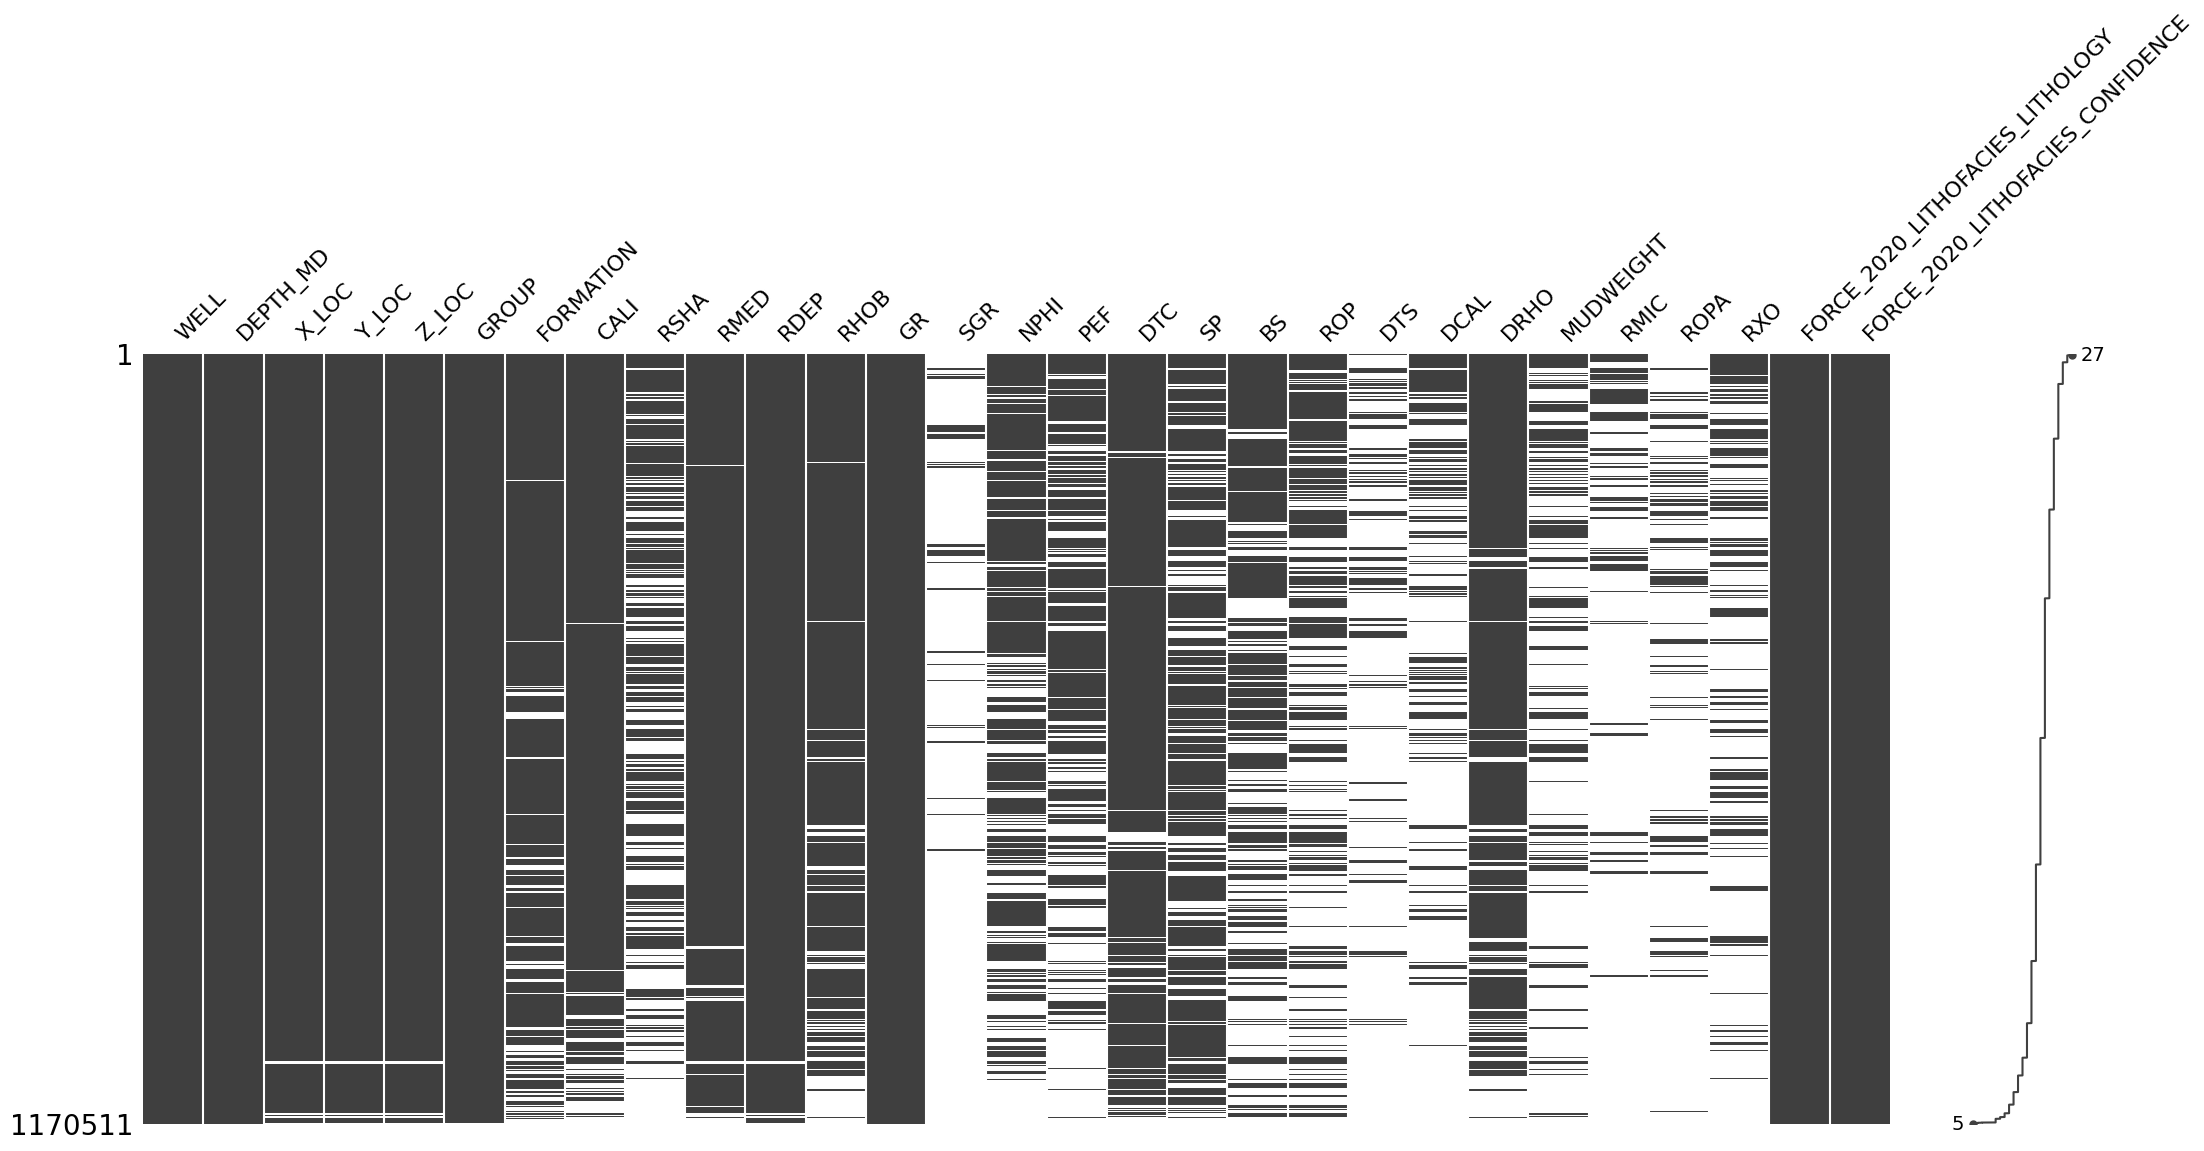

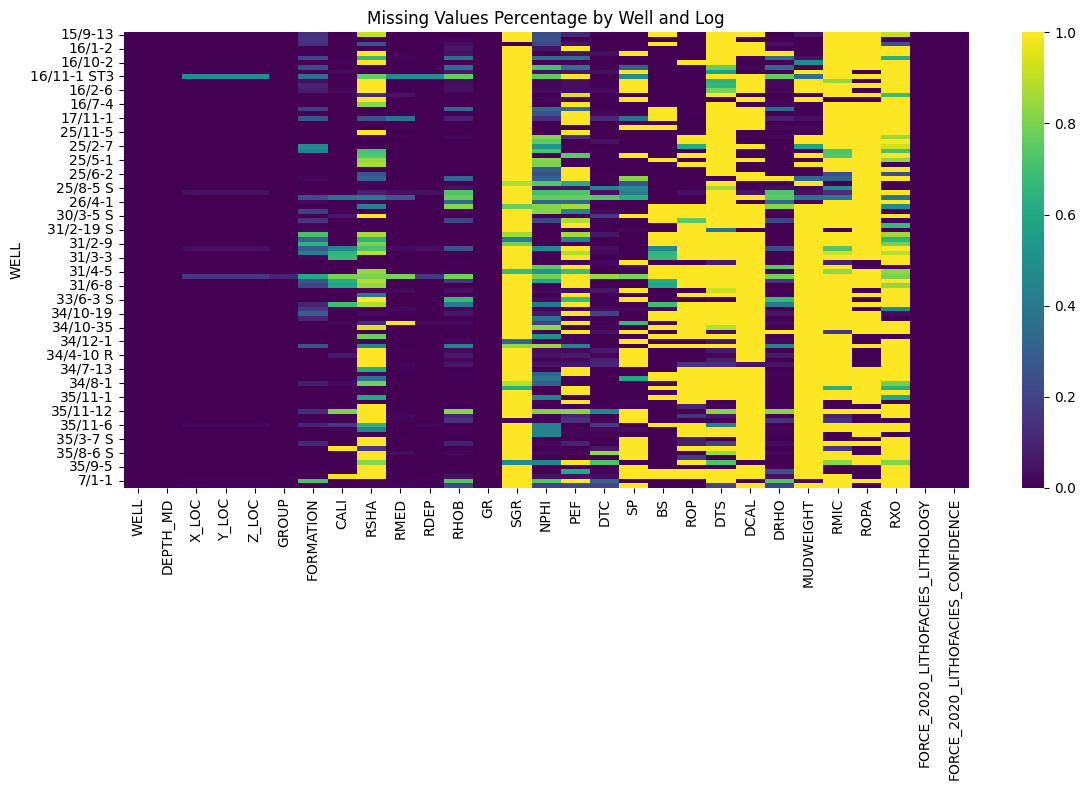

In [8]:
# Missing value analysis by well, depth, and log
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Matrix visualization of missing patterns
msno.matrix(raw_df, sort='descending')

# Heatmap of missing values percentage by well
missing_by_well = raw_df.groupby('WELL').apply(lambda x: x.isnull().mean())
plt.figure(figsize=(12, 8))
sns.heatmap(missing_by_well, cmap='viridis', annot=False)
plt.title('Missing Values Percentage by Well and Log')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Wells

In [9]:
# Number of wells
wells_number = raw_df["WELL"].nunique()
test_wells_number = test_df["WELL"].nunique()

print(f"Number of Wells in training data: {wells_number}")
print(f"Number of Wells in test data: {test_wells_number}")

Number of Wells in training data: 98
Number of Wells in test data: 10


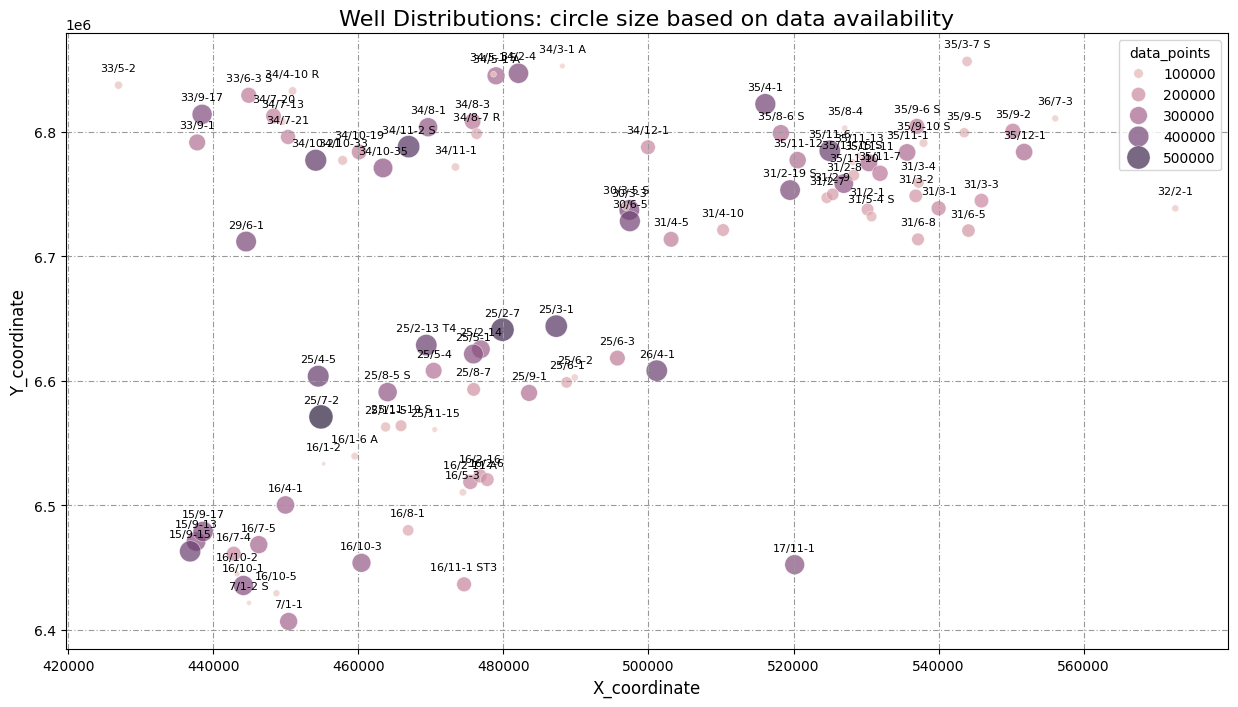

In [10]:
# Visualising the wells
well_uniq = raw_df["WELL"].unique()
well_grps = raw_df.groupby(['WELL'])
X_cor = well_grps['X_LOC'].mean()
Y_cor = well_grps['Y_LOC'].mean()
data_points = well_grps.count().sum(axis='columns')

# group data by wells
loc_wells_df = pd.DataFrame({'WELL': well_uniq, 'X_LOC': X_cor, 'Y_LOC': Y_cor, 'data_points': data_points})

xx = loc_wells_df.X_LOC
yy = loc_wells_df.Y_LOC
ss = loc_wells_df.data_points
ind = loc_wells_df.index

def mapPlot():
    fig, ax = plt.subplots(figsize=(15,8))

    sns.scatterplot(data=loc_wells_df, x=xx, y=yy, size=ss, alpha=.7,
                 hue="data_points",sizes=(10, 300), ax=ax)

    ax.set_title('Well Distributions: circle size based on data availability', fontsize = '16')
    ax.set_xlabel('X_coordinate', fontsize = '12')
    ax.set_ylabel('Y_coordinate', fontsize = '12')

    # well name labels
    for x,y,z in zip(xx,yy,ind):
        label_s = "{}".format(z)
        ax.annotate(label_s, (x,y),  textcoords="offset points", 
                 xytext=(0,10), ha='center', fontsize = '8') 

    ax.grid(True, color='0.6',axis='both', dashes=(5,2,1,2))

mapPlot()

### Visualise Logs

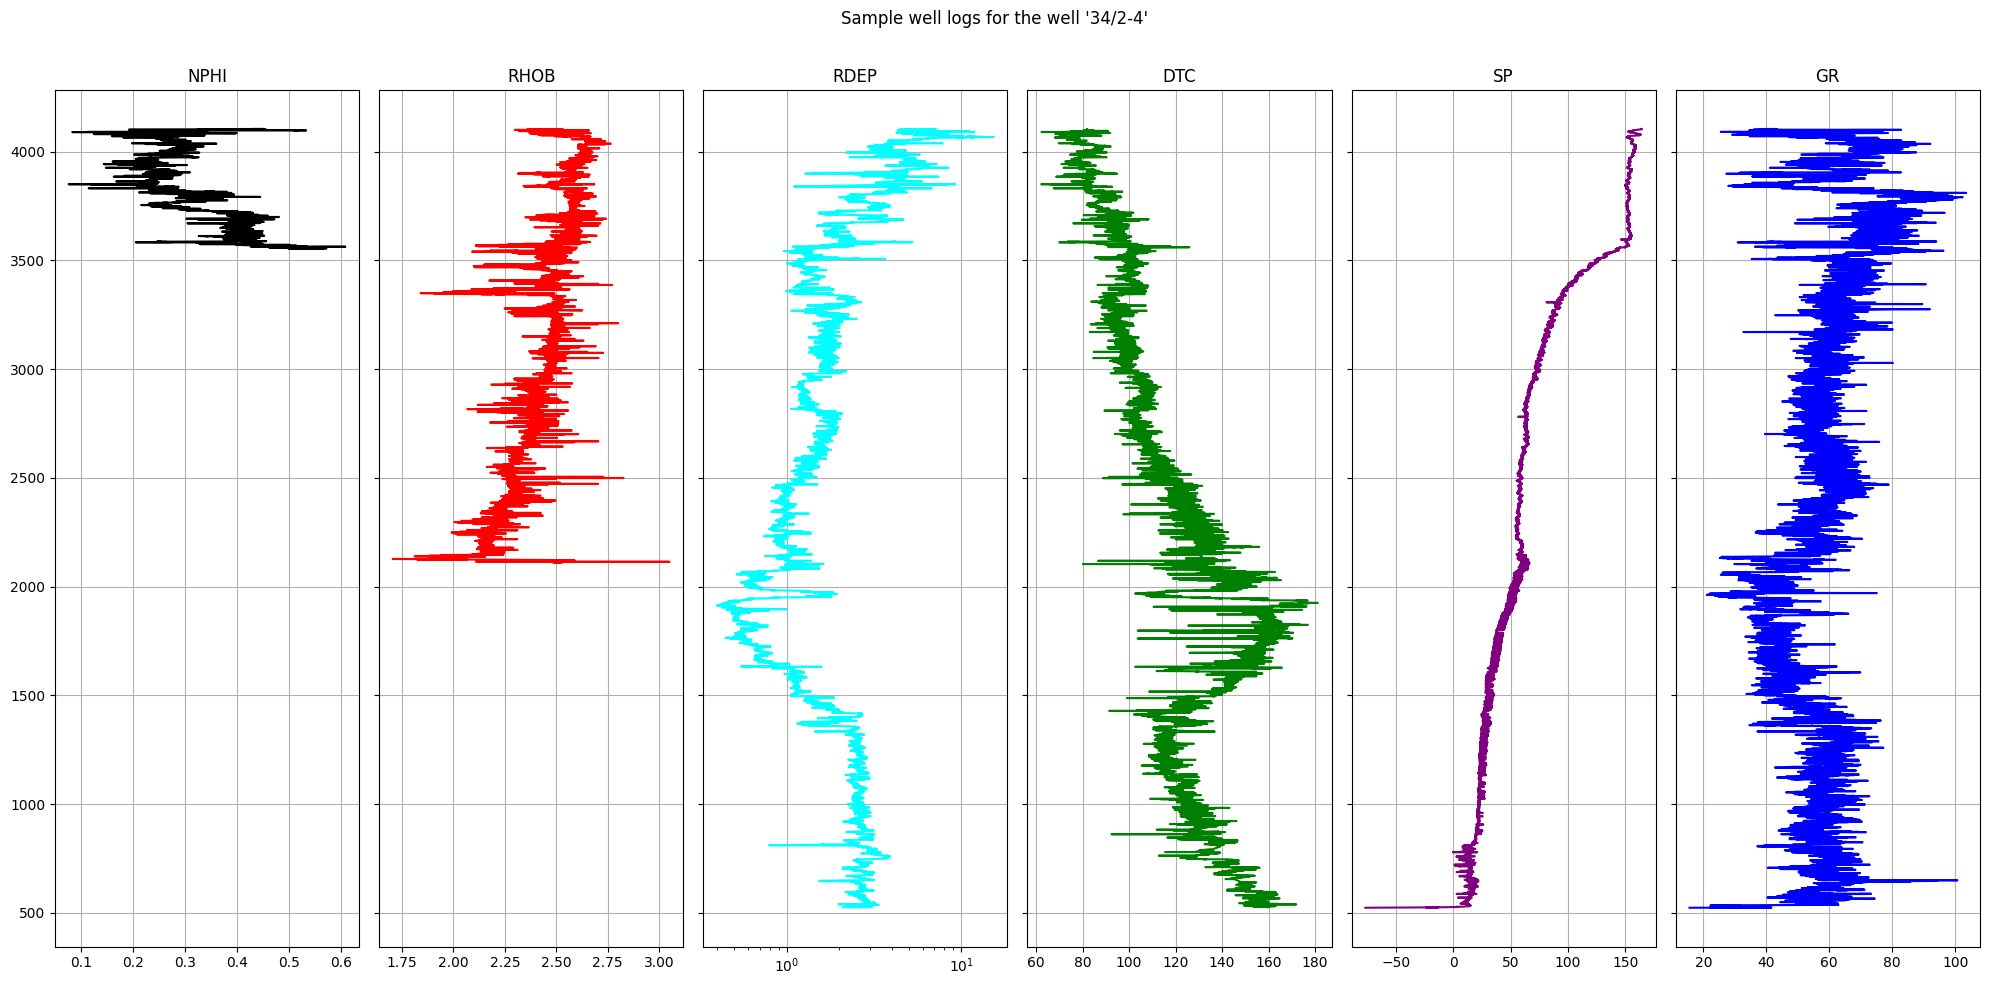

In [11]:
# # logs that we will use
# logs = ["NPHI", "RHOB", "RDEP", "DTC", "RDEP", "SP", "GR"]

# # create the subplots; ncols equals the number of logs
# fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))
# plt.suptitle("Sample well logs for the well '34/2-4'")

# colors = ['black', 'red', 'cyan', 'green', 'purple', 'orange', 'blue']

# for i in range(len(logs)):
#   if i == 2:
#     # for resistivity, semilog plot
#     ax[i].semilogx(raw_df.loc[raw_df['WELL'] == '34/2-4'][logs[i]], raw_df.loc[raw_df['WELL'] == '34/2-4']['DEPTH_MD'], color=colors[i])
#   else:
#     # for non-resistivity, normal plot
#     ax[i].plot(raw_df.loc[raw_df['WELL'] == '34/2-4'][logs[i]], raw_df.loc[raw_df['WELL'] == '34/2-4']['DEPTH_MD'], color=colors[i])
  
#   ax[i].set_title(logs[i])

# plt.gca().invert_yaxis()
# plt.show()

import matplotlib.pyplot as plt

# Logs we will use
logs = ["NPHI", "RHOB", "RDEP", "DTC", "SP", "GR"]

# Colors for each log
colors = ['black', 'red', 'cyan', 'green', 'purple', 'blue']

# Create the subplots with shared y-axis
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10), sharey=True)
plt.suptitle("Sample well logs for the well '34/2-4'")

for i in range(len(logs)):
    depth = raw_df.loc[raw_df['WELL'] == '34/2-4']['DEPTH_MD']
    log_data = raw_df.loc[raw_df['WELL'] == '34/2-4'][logs[i]]
    
    if i == 2:
        # Resistivity log on a semilog plot
        ax[i].semilogx(log_data, depth, color=colors[i])
    else:
        ax[i].plot(log_data, depth, color=colors[i])
    
    ax[i].set_title(logs[i])
    ax[i].invert_yaxis()  # Invert y-axis for each subplot
    ax[i].grid()

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.show()

### Well-wise Log Distribution

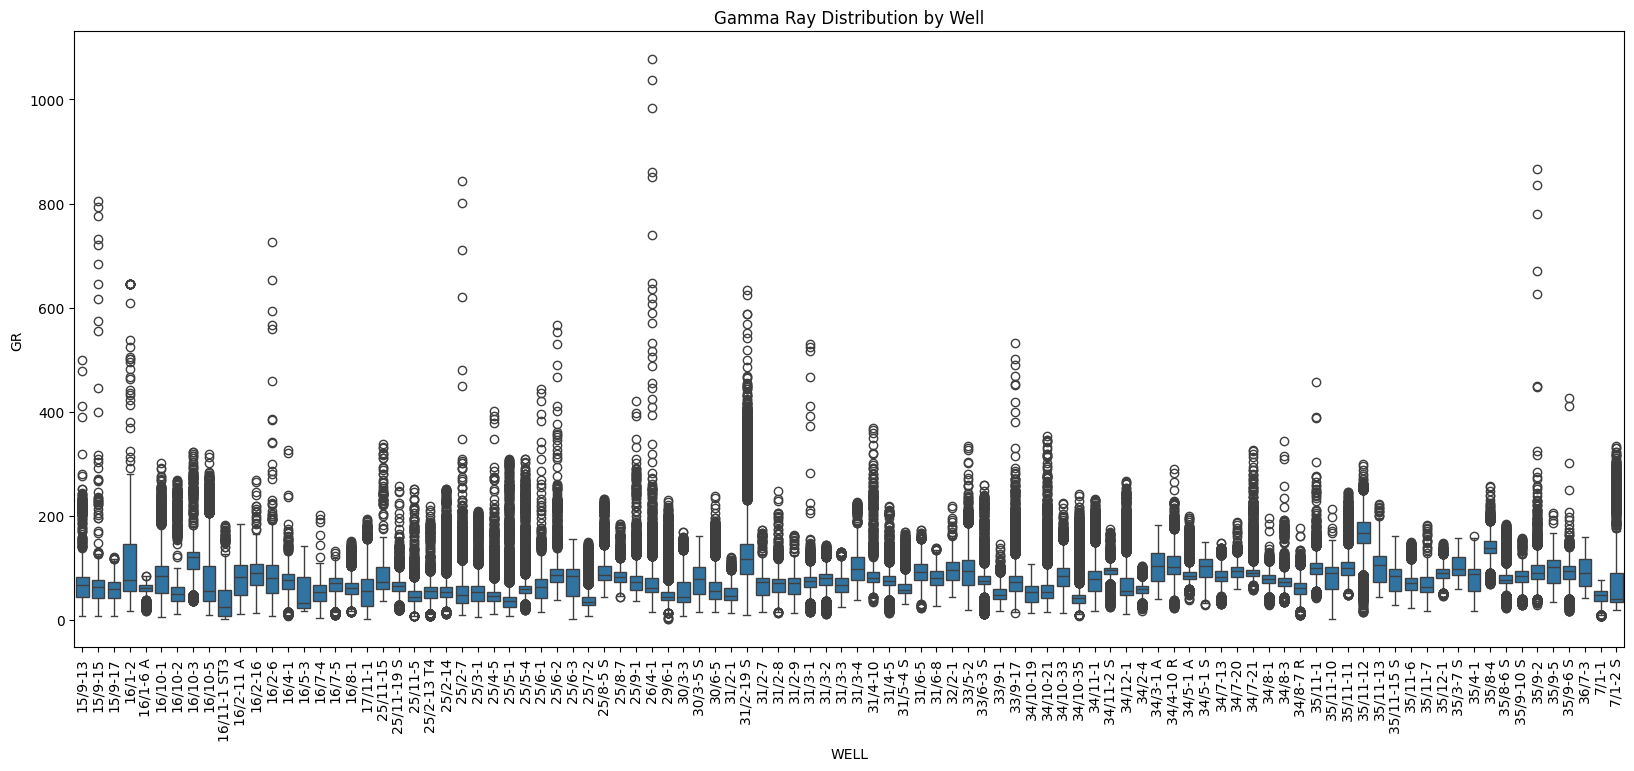

In [12]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='WELL', y='GR', data=raw_df)
plt.title('Gamma Ray Distribution by Well')
plt.xticks(rotation=90)
plt.show()

### Depth Based Statistics

/tmp/ipykernel_31335/172198281.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depth_stats = raw_df.groupby('DEPTH_BIN').agg({'GR': ['mean', 'std'], 'RHOB': ['mean', 'std']})


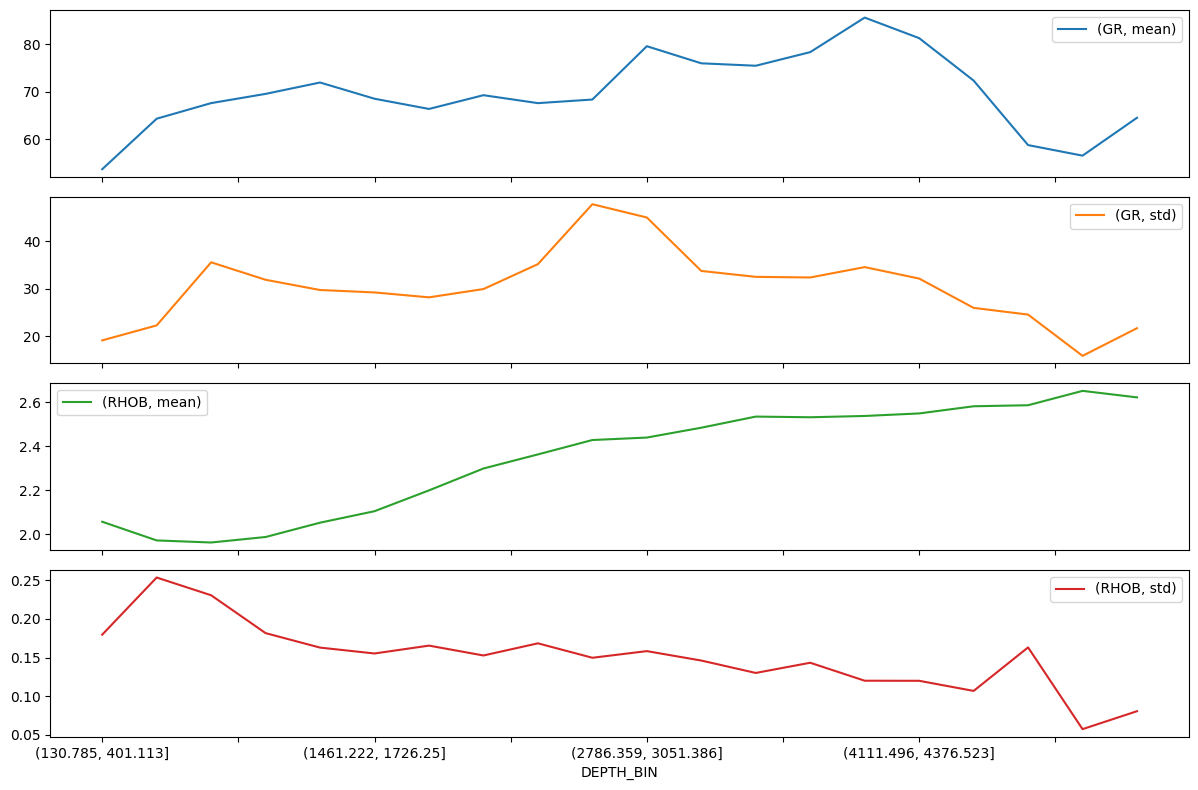

In [13]:
raw_df['DEPTH_BIN'] = pd.cut(raw_df['DEPTH_MD'], bins=20)
depth_stats = raw_df.groupby('DEPTH_BIN').agg({'GR': ['mean', 'std'], 'RHOB': ['mean', 'std']})
depth_stats.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()

### Lithology Classes


In [14]:
# these values are provided by the dataset (https://thinkonward.com/app/c/challenges/force-well-logs/overview)
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

/tmp/ipykernel_31335/3661165120.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names, rotation=45)


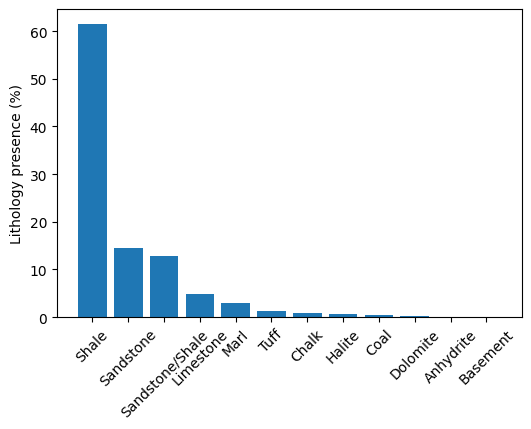

In [15]:
counts = raw_df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = raw_df['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]

for item in counts.items():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.bar(x=np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (%)');

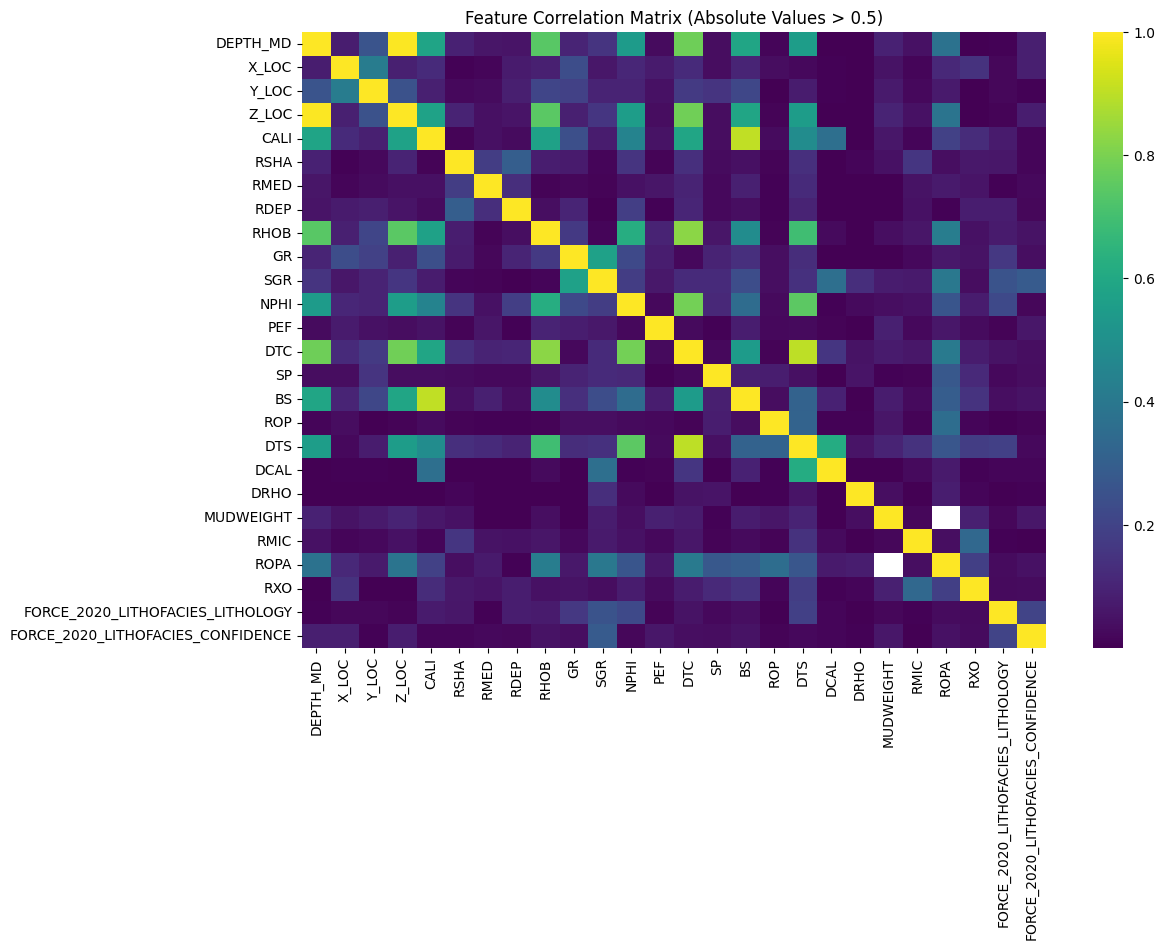

In [16]:
numeric_cols = raw_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = raw_df[numeric_cols].corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='viridis', fmt='.2f')
plt.title('Feature Correlation Matrix (Absolute Values > 0.5)')
plt.show()